# Demo 3

> Test Fast.ai models with a simple supervised learning test


In [15]:
# | default_exp demo.demo4

In [16]:
!gpustat

merlin                      Sat Jul 22 17:47:30 2023  525.116.04
[0] NVIDIA GeForce RTX 4090 | 42°C,   0 % | 12964 / 24564 MB | biagio(390M) biagio(2958M) biagio(263M) biagio(16M)
[1] NVIDIA GeForce RTX 4090 | 45°C,   0 % |     8 / 24564 MB | biagio(4M)


In [17]:
#| hide
from nbdev.showdoc import *

%matplotlib inline
from fastai.vision.all import *
from fastai.data.all import *
import torch.nn.functional as F

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

from Noise2Model.core import *

from IPython.display import clear_output, DisplayHandle
def update_patch(self, obj):
    clear_output(wait=True)
    self.display(obj)
DisplayHandle.update = update_patch

In [18]:
bs, size = 4, 512
# arch = models.resnet34
path = Path('../_data/Confocal_BPAE_B/')
path_train_raw = Path(path/"raw")
path_train_gt = Path(path/"gt")

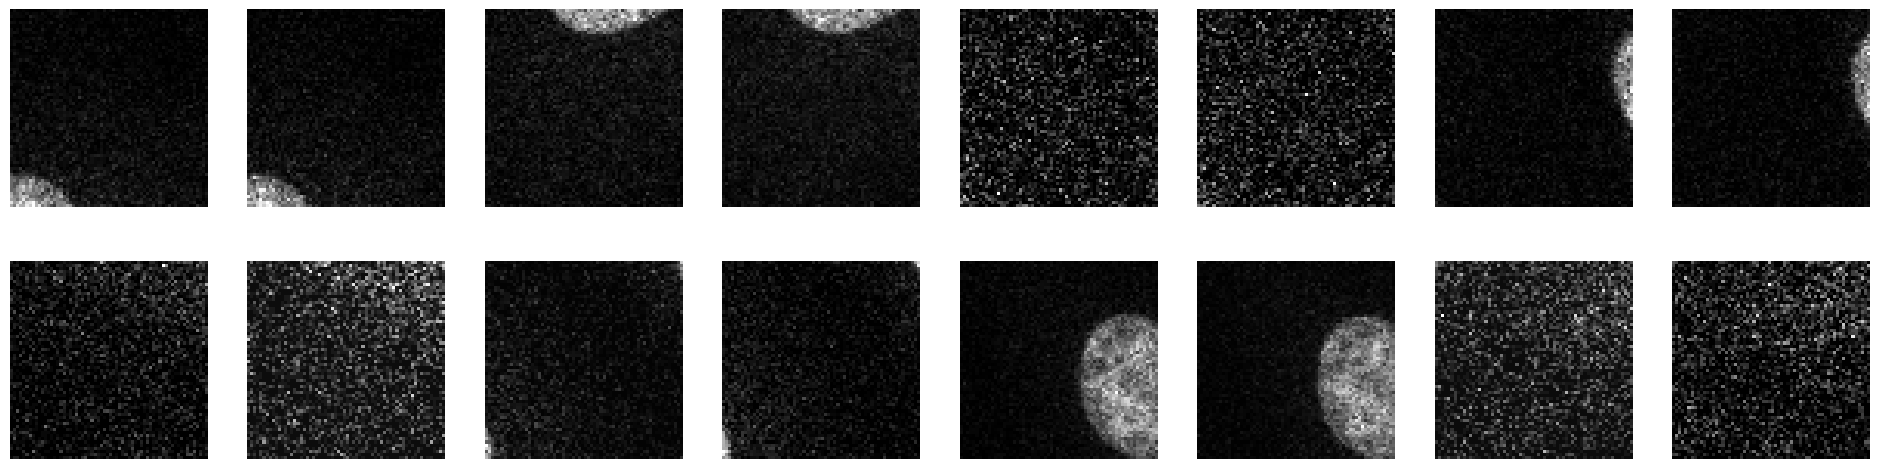

In [19]:
dblock = DataBlock(blocks=(ImageBlock(cls=PILImageBW), ImageBlock(cls=PILImageBW)),
                   get_items=get_image_files,
                   get_y=get_noisy_pair,
                   splitter=RandomSplitter(valid_pct=0.2),
                   item_tfms=RandomCrop(64),
                   )
# dblock.summary(path_train_raw)
# dsets = dblock.datasets(path_train_raw)
# dsets.train[0]
dls = dblock.dataloaders(path_train_raw)
dls.show_batch(max_n=8, cmap='gray')

In [20]:
from Noise2Model.noise2noiseflow import Noise2NoiseFlow
from Noise2Model.models import UNet

In [21]:
x,y = dls.one_batch()
x_shape = (x.shape)
net = Noise2NoiseFlow(x_shape[1:], arch='gain', denoiser=UNet(3))
# z, objective, denoised = net.forward(x.to('cpu'))
# test_eq(denoised.shape, x.shape)

|-Gain


In [22]:
learn = Learner(dls, net, loss_func=F.l1_loss)
learn.summary()

Noise2NoiseFlow (Input shape: 64 x 1 x 64 x 64)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 32 x 64 x 64   
Conv2d                                    288        True      
BatchNorm2d                               64         True      
ReLU                                                           
Conv2d                                    9216       True      
BatchNorm2d                               64         True      
ReLU                                                           
____________________________________________________________________________
                     64 x 32 x 32 x 32   
MaxPool2d                                                      
____________________________________________________________________________
                     64 x 64 x 32 x 32   
Conv2d                                    18432      True      
BatchNorm2d                               128        True      
ReLU                            

In [23]:
# learn.show_training_loop()

In [24]:
# learn.lr_find()

In [25]:
learn.fit_one_cycle(10, lr_max=1e-03) #cbs=ShowGraphCallback()

epoch,train_loss,valid_loss,time
0,0.051459,0.024554,00:07
1,0.032294,0.018879,00:08
2,0.025685,0.018944,00:08
3,0.022508,0.018811,00:08
4,0.020646,0.018740,00:08
5,0.019423,0.018538,00:08
6,0.018730,0.018371,00:08
7,0.018001,0.018301,00:08
8,0.017478,0.018297,00:08
9,0.017272,0.018204,00:08


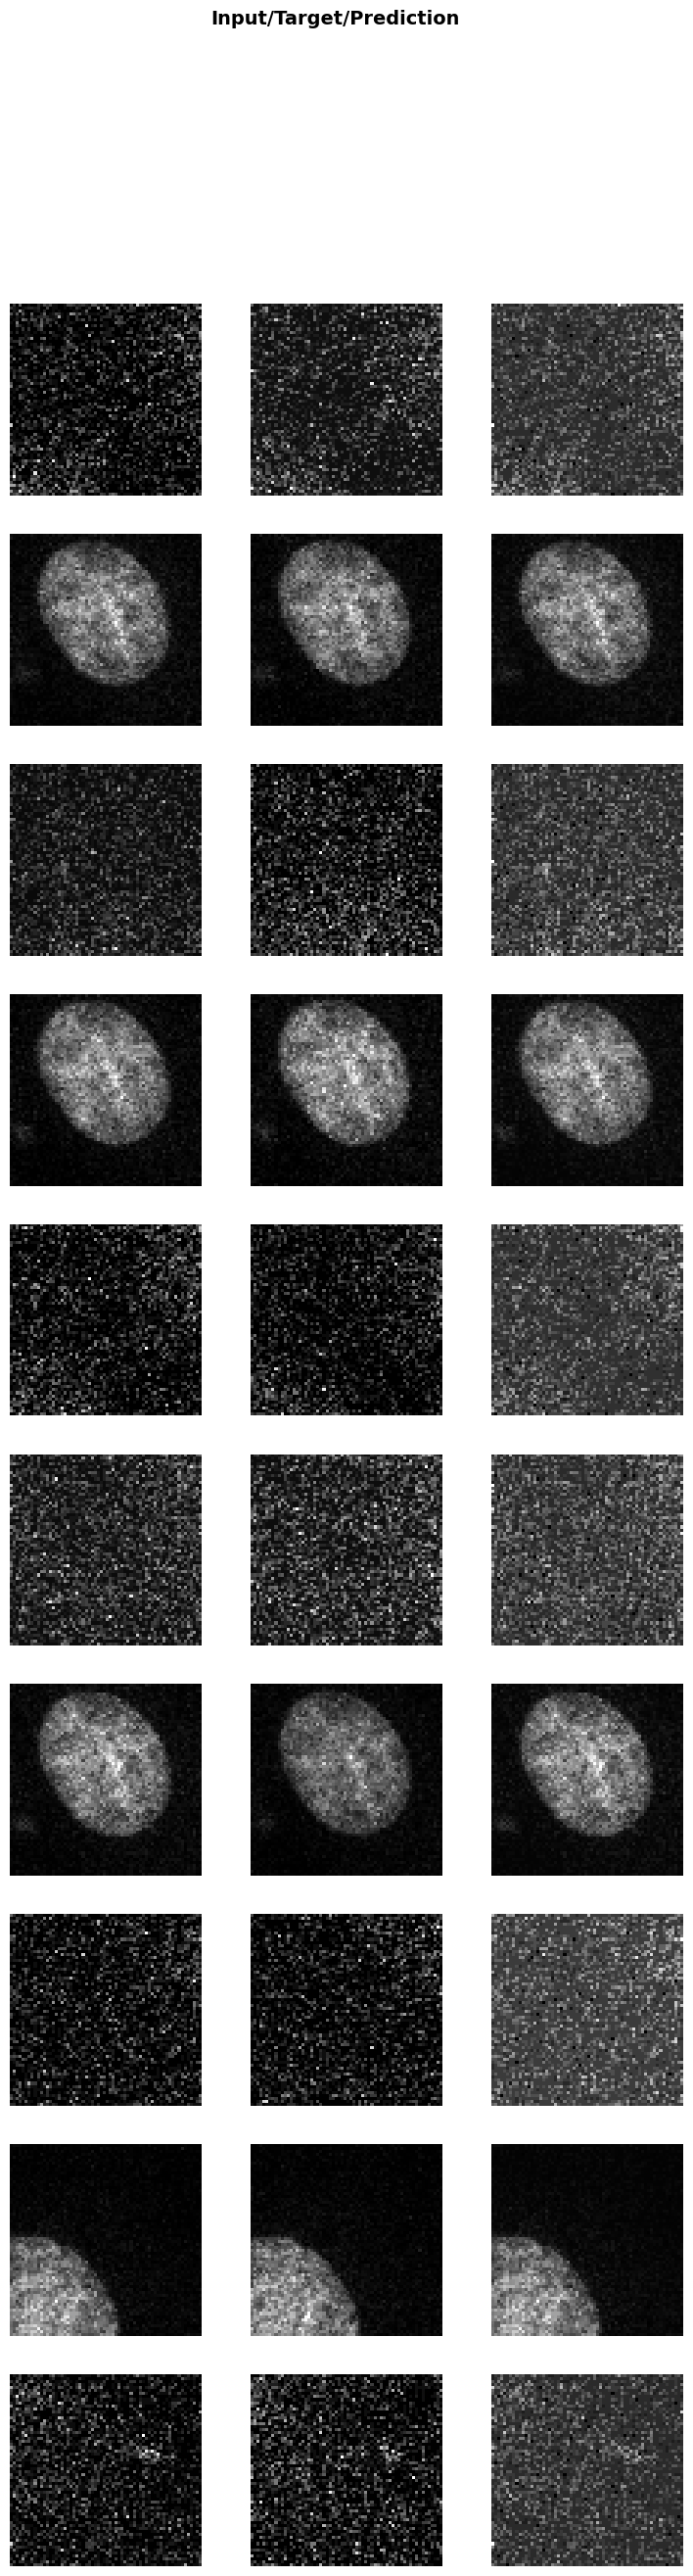

In [26]:
learn.show_results(max_n=10, cmap='gray')

In [27]:
# | hide
import nbdev
nbdev.nbdev_export()